### Chapter 7 Activities



In [22]:
# Import necessary Libraries
import pandas as pd
import chardet #To identify Encoding Type

In [23]:
# Identifying the encoding type & Reading Candy Hierarchry CSV

with open('candyhierarchy2017.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('candyhierarchy2017.csv', encoding=result['encoding'])
df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [24]:
# Filter out missing data
df = df.dropna(subset=['Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY']) #Drop rows where key identifying columns are missing
df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Fill in missing data

#Fill missing data in text columns with a placeholder
text_cols = df.select_dtypes(include='object').columns
df[text_cols] = df[text_cols].fillna("Unknown")

#Fill missing numeric values with the mean
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

#Verify no missing values left
print(df.isnull().sum())

Internal ID                 0
Q1: GOING OUT?              0
Q2: GENDER                  0
Q3: AGE                     0
Q4: COUNTRY                 0
                           ..
Q12: MEDIA [Daily Dish]     0
Q12: MEDIA [Science]        0
Q12: MEDIA [ESPN]           0
Q12: MEDIA [Yahoo]          0
Click Coordinates (x, y)    0
Length: 120, dtype: int64


In [26]:
# Remove duplicates
df = df.drop_duplicates()

print("Total duplicate rows:", df.duplicated().sum()) # Check for Duplicates

Total duplicate rows: 0


In [27]:
# Transform data using mapping for Gender
gender_map = {
    'male': 'Male',
    'm': 'Male',
    'M': 'Male',
    'female': 'Female',
    'f': 'Female',
    'F': 'Female'
}

df['Q2: GENDER'] = df['Q2: GENDER'].str.strip().str.lower().map(gender_map)

df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,Unknown,Bottom line is Twix is really the only candy w...,White and gold,Unknown,Sunday,1.0,1.0,1.0,1.0,"(84, 25)"
2,90272829,Unknown,Male,49,USA,Virginia,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,1.0,1.0,1.0,Unknown
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,Unknown,Raisins can go to hell,White and gold,Unknown,Sunday,1.0,1.0,1.0,1.0,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,Unknown,Unknown,White and gold,Unknown,Friday,1.0,1.0,1.0,1.0,"(70, 10)"
6,90272853,No,Male,53,usa,Colorado,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,1.0,1.0,1.0,Unknown


In [28]:
# Age Group Transformation using Custom Function

def age_group(age):
    try:
        age = int(age)
        if age < 18:
            return 'Child'
        elif age < 35:
            return 'Young Adult'
        elif age < 60:
            return 'Adult'
        else:
            return 'Senior'
    except:
        return 'Unknown'

df['Age Group'] = df['Q3: AGE'].apply(age_group)

df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)",Age Group
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,Bottom line is Twix is really the only candy w...,White and gold,Unknown,Sunday,1.0,1.0,1.0,1.0,"(84, 25)",Adult
2,90272829,Unknown,Male,49,USA,Virginia,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,1.0,1.0,1.0,1.0,Unknown,Adult
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,Raisins can go to hell,White and gold,Unknown,Sunday,1.0,1.0,1.0,1.0,"(75, 23)",Adult
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,Unknown,White and gold,Unknown,Friday,1.0,1.0,1.0,1.0,"(70, 10)",Young Adult
6,90272853,No,Male,53,usa,Colorado,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,1.0,1.0,1.0,1.0,Unknown,Adult


In [29]:
# Replace values using Mapping

# Standardize text: lowercase and strip whitespace
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].astype(str).str.strip().str.lower()

# Define the mapping dictionary
country_map = {
    # USA variations
    'usa': 'USA', 'us': 'USA', 'united states': 'USA', 'united states of america': 'USA',
    'america': 'USA', 'murica': 'USA', 'u.s.a.': 'USA', 'u.s.': 'USA', 'u s': 'USA',
    'us of a': 'USA', 'united state': 'USA', 'unied states': 'USA', 'unites states': 'USA',
    'united staes': 'USA', 'united statss': 'USA', 'united ststes': 'USA',
    'usa? hard to tell anymore..': 'USA', 'usa! usa! usa!': 'USA', 'usaa': 'USA',
    "'merica": 'USA', 'usausausa': 'USA', 'i pretend to be from canada, but i am really from the united states.': 'USA',
    'north carolina': 'USA', 'new jersey': 'USA', 'california': 'USA', 'pittsburgh': 'USA',
    
    # Canada variations
    'canada': 'Canada', 'canada ': 'Canada', 'can': 'Canada', 'canae': 'Canada',
    'canada`': 'Canada', 'soviet canuckistan': 'Canada',

    # UK variations
    'uk': 'UK', 'u.k.': 'UK', 'united kingdom': 'UK', 'england': 'UK',
    'uk ': 'UK', 'scotland': 'UK', 'scotland ': 'UK', 'endland': 'UK',

    # Other countries
    'france': 'France', 'france ': 'France', 'germany': 'Germany', 'japan': 'Japan',
    'china': 'China', 'australia': 'Australia', 'greece': 'Greece', 'iceland': 'Iceland',
    'indonesia': 'Indonesia', 'ireland': 'Ireland', 'ireland ': 'Ireland',
    'south africa': 'South Africa', 'south korea': 'South Korea', 'sweden': 'Sweden',
    'switzerland': 'Switzerland', 'taiwan': 'Taiwan', 'spain': 'Spain',
    'singapore': 'Singapore', 'hong kong': 'Hong Kong', 'the netherlands': 'Netherlands',
    'netherlands': 'Netherlands',

    # Others / unclear
    'earth': 'Other', 'atlantis': 'Other', 'narnia': 'Other', 'fear and loathing': 'Other',
    'i don\'t know anymore': 'Other', 'insanity lately': 'Other', 'trumpistan': 'Other',
    'ahem....amerca': 'Other', '1': 'Other', 'ud': 'Other', 'a': 'Other',
    'new york': 'USA', 'europe': 'Other', 'unhinged states': 'USA',
    'cascadia': 'Other', 'n. america': 'Other', 'subscribe to dm4uz3 on youtube': 'Other'
}

# Apply mapping
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].map(country_map).fillna('Other')

df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)",Age Group
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,Bottom line is Twix is really the only candy w...,White and gold,Unknown,Sunday,1.0,1.0,1.0,1.0,"(84, 25)",Adult
2,90272829,Unknown,Male,49,USA,Virginia,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,1.0,1.0,1.0,1.0,Unknown,Adult
3,90272840,No,Male,40,USA,or,MEH,DESPAIR,JOY,MEH,...,Raisins can go to hell,White and gold,Unknown,Sunday,1.0,1.0,1.0,1.0,"(75, 23)",Adult
4,90272841,No,Male,23,USA,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,Unknown,White and gold,Unknown,Friday,1.0,1.0,1.0,1.0,"(70, 10)",Young Adult
6,90272853,No,Male,53,USA,Colorado,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,1.0,1.0,1.0,1.0,Unknown,Adult


In [30]:
# Discretization and Binning

# convert it to numeric if it's not already
df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'], errors='coerce')

# Define bin edges
bins = [0, 18, 30, 45, 60, 100]
labels = ['Under 18', '18-30', '31-45', '46-60', '60+']

# Create a new binned column
df['Age Group'] = pd.cut(df['Q3: AGE'], bins=bins, labels=labels)

# Display sample data
print(df[['Q3: AGE', 'Age Group']].head(10))

    Q3: AGE Age Group
1      44.0     31-45
2      49.0     46-60
3      40.0     31-45
4      23.0     18-30
6      53.0     46-60
7      33.0     31-45
8      40.0     31-45
9      53.0     46-60
11     56.0     46-60
12     64.0       60+


In [31]:
#Manipulate Strings

# Strip whitespace and convert to lowercase
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.strip().str.lower()

# Replace common abbreviations or typos
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].replace({
    'calif': 'california',
    'ca': 'california',
    'ny': 'new york',
    'n.y.': 'new york',
    'tx': 'texas',
    'tx.': 'texas',
    'va': 'virginia',
    'nm': 'new mexico',
    'or': 'oregon',
    'wa': 'washington',
    'il': 'illinois',
    'fl': 'florida'
})

# Check for rows that mention "new"
df['has_new'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.contains('new', na=False)

# Extract the first word in the location
df['state_first_word'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.extract(r'^(\w+)')

# See top 10 most common states
top_states = df['Q5: STATE, PROVINCE, COUNTY, ETC'].value_counts().head(10)
print(top_states)


Q5: STATE, PROVINCE, COUNTY, ETC
california      299
new york        113
illinois        103
washington      102
texas            94
oregon           83
ontario          77
virginia         67
pennsylvania     47
bc               46
Name: count, dtype: int64


### Chapter 8 Activities

In [32]:
# Create hierarchical index

# Key columns are cleaned
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip().str.lower()
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.strip().str.lower()

# Create the hierarchical index
df_hier = df.set_index(['Q4: COUNTRY', 'Q5: STATE, PROVINCE, COUNTY, ETC'])

# Display the first few rows
print(df_hier.head())

                                              Internal ID Q1: GOING OUT?  \
Q4: COUNTRY Q5: STATE, PROVINCE, COUNTY, ETC                               
usa         new mexico                           90272821             No   
            virginia                             90272829        Unknown   
            oregon                               90272840             No   
            exton pa                             90272841             No   
            colorado                             90272853             No   

                                             Q2: GENDER  Q3: AGE  \
Q4: COUNTRY Q5: STATE, PROVINCE, COUNTY, ETC                       
usa         new mexico                             Male     44.0   
            virginia                               Male     49.0   
            oregon                                 Male     40.0   
            exton pa                               Male     23.0   
            colorado                               Male    

In [33]:
# Combine and Merge Datasets 

# Create 2nd data set
country_info = pd.DataFrame({
    'country_clean': ['usa', 'canada', 'uk'],
    'continent': ['North America', 'North America', 'Europe'],
    'pop_millions': [331, 38, 68]
})

# Clean Country column in 1st dateset
df['country_clean'] = df['Q4: COUNTRY'].str.strip().str.lower()

#Merge Both dataset
merged_df = pd.merge(df, country_info, how='left', on='country_clean')

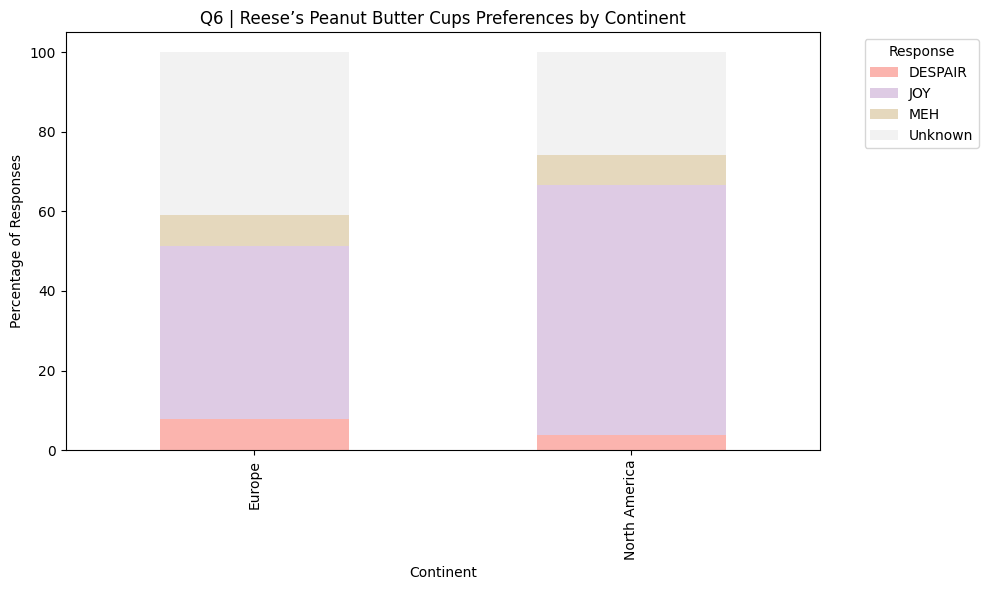

In [34]:
# Candy Preference by Continent using merged_df

import matplotlib.pyplot as plt

# Pick a candy column you're interested in
candy_column = 'Q6 | Reese’s Peanut Butter Cups'

# Drop rows where continent or candy column is missing
filtered_df = merged_df.dropna(subset=['continent', candy_column])

# Group and count responses
candy_continent = filtered_df.groupby(['continent', candy_column]).size().unstack().fillna(0)

# Optional: Convert to percentages
candy_continent_pct = candy_continent.div(candy_continent.sum(axis=1), axis=0) * 100

# Plot
candy_continent_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title(f"{candy_column} Preferences by Continent")
plt.ylabel("Percentage of Responses")
plt.xlabel("Continent")
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
# Reshape with melt

# select only the columns that are candy-related
candy_columns = [col for col in merged_df.columns if col.startswith("Q6 |")]

# Melt the dataframe to long format
reshaped_df = merged_df.melt(
    id_vars=['continent'],  # Keep continent as identifier
    value_vars=candy_columns,  # Melt all Q6 candy columns
    var_name='Candy',
    value_name='Preference'
)

# Drop rows with missing values
reshaped_df = reshaped_df.dropna(subset=['Preference'])

# Display sample
print(reshaped_df.head())

       continent               Candy Preference
0  North America  Q6 | 100 Grand Bar        MEH
1  North America  Q6 | 100 Grand Bar    Unknown
2  North America  Q6 | 100 Grand Bar        MEH
3  North America  Q6 | 100 Grand Bar        JOY
4  North America  Q6 | 100 Grand Bar    Unknown


In [36]:
# Create pivot table
pivot_df = pd.pivot_table(
    reshaped_df,
    index='continent',
    columns='Candy',
    values='Preference',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else None
)

# Display sample
print(pivot_df.head())

Candy         Q6 | 100 Grand Bar Q6 | Abstained from M&M'ing.  \
continent                                                       
Europe                   Unknown                      Unknown   
North America                JOY                      Unknown   

Candy         Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)  \
continent                                                                                              
Europe                                                   Unknown                                       
North America                                            DESPAIR                                       

Candy         Q6 | Any full-sized candy bar Q6 | Black Jacks Q6 | Blue M&M's  \
continent                                                                      
Europe                                  JOY          Unknown         Unknown   
North America                           JOY          Unknown             JOY   

C

### Chapter 10 Activities

In [ ]:
# Grouping with Dicts/Series

# Full state name to region mapping
state_region_mapping_full = {
    'new mexico': 'Southwest',
    'virginia': 'South',
    'oregon': 'West',
    'pennsylvania': 'Northeast',
    'texas': 'South',
    'california': 'West',
    'arizona': 'Southwest',
    'new york': 'Northeast',
    'north carolina': 'South',
    'illinois': 'Midwest',
    'florida': 'South',
    'ohio': 'Midwest',
    'michigan': 'Midwest',
    'georgia': 'South',
    'minnesota': 'Midwest',
    'washington': 'West',
    'colorado': 'West',
    'massachusetts': 'Northeast',
    'indiana': 'Midwest',
    'missouri': 'Midwest',
    'wisconsin': 'Midwest',
}

# Clean the 'STATE' column (lowercase, remove trailing spaces)
merged_df['Q5: STATE, PROVINCE, COUNTY, ETC'] = merged_df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.strip().str.lower()

# Map the cleaned values
merged_df['Region'] = merged_df['Q5: STATE, PROVINCE, COUNTY, ETC'].map(state_region_mapping_full)

# Group by Region and count
region_counts = merged_df.groupby('Region').size()
print(region_counts)

Region
Midwest      275
Northeast    206
South        240
Southwest     30
West         520
dtype: int64


In [40]:
# Grouping with Functions

# Define a function
def age_group(age):
    try:
        age = int(age)
        if age < 18:
            return 'Child'
        elif age < 30:
            return 'Young Adult'
        elif age < 60:
            return 'Adult'
        else:
            return 'Senior'
    except:
        return 'Unknown'

# Apply groupby using the function
grouped = merged_df.groupby(lambda idx: age_group(merged_df.loc[idx, 'Q3: AGE']))

# Count how many people in each age group
print(grouped.size())

Adult          1871
Child            56
Senior          186
Unknown          25
Young Adult     226
dtype: int64


In [ ]:
# Grouping with Index Levels

# Creating index
merged_df = merged_df.set_index(['Q4: COUNTRY', 'Q5: STATE, PROVINCE, COUNTY, ETC'])

#Grouping by a single index level
grouped_by_country = merged_df.groupby(level='Q4: COUNTRY')

# Count how many responses per country
print(grouped_by_country.size())


Q4: COUNTRY
australia          7
canada           225
china              2
france             3
germany           10
greece             1
hong kong          2
iceland            1
indonesia          1
ireland            4
japan              5
netherlands        7
other             39
singapore          1
south africa       1
south korea        1
spain              1
sweden             2
switzerland        3
taiwan             1
uk                39
usa             2008
dtype: int64


In [45]:
# Split/Apply/Combine

# Split: by Country
# Apply: find the most common candy rating (JOY, DESPAIR, MEH)
# Combine: into a new DataFrame

# Pick some candy columns
candy_columns = [col for col in merged_df.columns if col.startswith('Q6 |')]

# Melt the dataframe to long format to make candy easier to analyze
long_candy = merged_df.melt(id_vars=['country_clean'], value_vars=candy_columns,
                            var_name='Candy', value_name='Preference')

# Now apply Split-Apply-Combine
result = long_candy.groupby(['country_clean', 'Candy'])['Preference'].apply(lambda x: x.value_counts().idxmax())

# Reset index to make it cleaner
result = result.reset_index(name='Top Preference')

print(result.head())

  country_clean                                              Candy  \
0     australia                                 Q6 | 100 Grand Bar   
1     australia                       Q6 | Abstained from M&M'ing.   
2     australia  Q6 | Anonymous brown globs that come in black ...   
3     australia                      Q6 | Any full-sized candy bar   
4     australia                                   Q6 | Black Jacks   

  Top Preference  
0        Unknown  
1        Unknown  
2        Unknown  
3        Unknown  
4        Unknown  
